# Simulación del Movimiento Browniano (MB)

Recordemos que un Movimiento Browniano Estándar (MBE) es un proceso estocástico a tiempo continuo $\{X(t)\}_{t \geq 0}$ tal que:

* $X(0) = 0$
* Tiene incrementos estacionarios e independientes
* $X(t) \sim \mathcal{N}(0, c^2t)$

### Simulación desde una Caminata Aleatoria

Para simular un MB desde una caminata aleatoria consideraremos variables aleatorias independientes $X_1, X_2, ...$ tales que

$$ \mathbb{P}[X_i = 1] = \mathbb{P}[X_i = -1] = \frac{1}{2}$$

Si definimos $S_n = \sum_{i=1}^nX_i$, entonces por el Teorema Central del Límite, tenemos que

$$  \mathbb{P}[ \frac{S_{[nt]}}{\sqrt{n}} \leq z] ⟶  \mathbb{P}[ X(t) \leq z]$$

cuando $n ⟶ ∞$ y donde $X(t) \sim \mathcal{N}(0,1)$

**Pseudo-Código para simular un MBE desde una caminata aleatoria**
Sea $N \in \mathbb{N}$ grande. Buscamos una trayectoria $\{W(t_1), W(t_2), ..., W(t_N)\}$ del proceso en un intervalo $[0,T]$.

1. Simular una caminata aleatoria.
2. Calcular $X(t_i) = \frac{S_{[Nt_i]}}{\sqrt{N}}$ para cada $i \in \{1,...,N\}$

Usaremos el código de [CM1_EjemplosdeProcesos](https://github.com/eliasegn/Procesos_I/blob/main/CM1_EjemplosdeProcesos.ipynb) para simular caminatas aleatorias

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class CaminataAleatoria:

  # Definimos los datos iniciales
  def __init__(self, N, p, k_0):
    '''
    k_0: valor inicial de la caminata
    N: número de pasos
    p: probabilidad de que se mueva en la dirección positiva
    '''
    self.k_0 = k_0
    self.N = N
    self.p = p
    self.caminata_aleatoria = [k_0]

  # Función para simular la caminata
  def simular(self):
    for i in range(1, self.N):
        b = np.random.choice([-1, 1], p=[1 - self.p, self.p])
        self.caminata_aleatoria.append(self.caminata_aleatoria[-1] + b)
    return True

  # Función para imprimir la cadena
  def __str__(self):
    return str(self.caminata_aleatoria)

  # Función para graficar la cadena
  def plot(self):
    plt.style.use('seaborn-v0_8-dark')
    data = pd.DataFrame({'t': np.arange(1, self.N + 1), 'c': self.caminata_aleatoria})
    plt.figure(figsize=(7, 4))
    plt.plot(data['t'], data['c'], color='black')
    plt.grid()
    plt.title(f'Caminata aleatoria con p = {self.p}')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor del Proceso')
    plt.show()

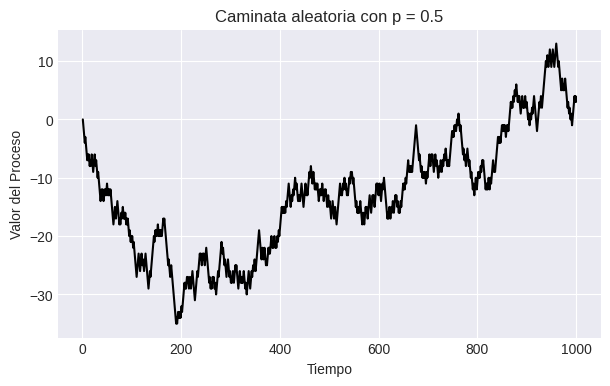

In [67]:
ca1 = CaminataAleatoria(N=1000, p=0.5, k_0=0)
ca1.simular()
ca1.plot()

Actualizaremos el código para agregar el MBE

In [68]:
class MovimientoBrowniano(CaminataAleatoria):
    def __init__(self, N, k_0=0):
      # Heredamos con p=0.5 (caminata aleatoria simple simétrica)
      super().__init__(N=N, p=0.5, k_0=k_0)
      self.Wt = np.array([k_0])

    def simular(self):
      super().simular()  # genera la caminata aleatoria

    def calcular_browniano(self, T=1):
      super().simular()
      t = np.linspace(0, T, self.N)
      #W_tn = np.array(self.caminata_aleatoria) / np.array(np.sqrt(range(len(self.caminata_aleatoria))))
      W_tn = np.array(self.caminata_aleatoria) / np.sqrt(self.N)
      return t, W_tn

    def plot_browniano(self, T=1):
      t, W_tn = self.calcular_browniano(T)
      plt.figure(figsize=(7, 4))
      plt.plot(t, W_tn, color='navy')
      plt.grid()
      plt.title(r'Movimiento Browniano Estándar')
      plt.xlabel('tiempo')
      plt.ylabel(r'$X(t)$')
      plt.show()

Veamos cómo se ve esto con algunos ejemplos

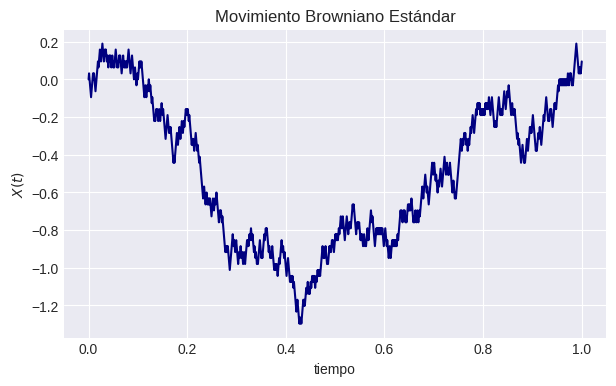

In [69]:
mb1 = MovimientoBrowniano(N=1000)
mb1.plot_browniano()

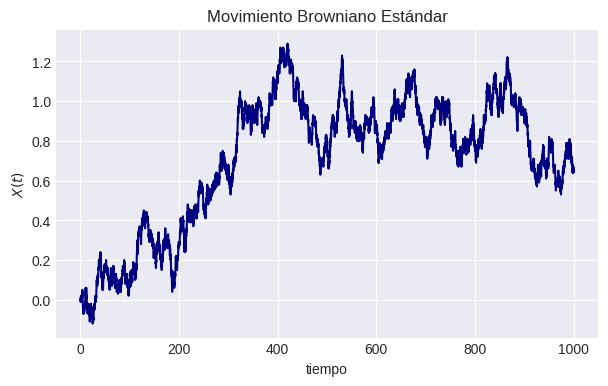

In [70]:
mb2 = MovimientoBrowniano(N=10000)
#mb2.simular()
mb2.plot_browniano(1000)

Por otro lado, en general un Movimiento Browniano es un proceso estocástico  $\{W(t)\}_{t \geq 0}$ que cumple que:

$$ W(t) = w_0 + \mu t + \sigma X(t)$$

donde $\{W(t)\}_{t \geq 0}$ es un MBE.

Sabemos que esto es un movimiento browniano alrededor de la recta $w_0 + \mu t$ y con derivada $\sigma ^2$.

Ahora actualizaremos el código para simular un MBE y lo compararemos con la recta

In [71]:
class MB(MovimientoBrowniano):

  def __init__(self, N, mu, sigma, k_0=0):
    '''
    N: número de pasos
    mu: parámetro del proceso MB
    sigma: parámetro del proceso MB
    k_0: valor inicial del proceso MB
    '''
    super().__init__(N=N, k_0=k_0)
    self.mu = mu
    self.sigma = sigma
    self.w_0 = k_0
    self.Wt = None

  def simular_mbg(self):
    t, W_tn = super().calcular_browniano()
    # Aplicamos la definición del MB
    self.Wt = self.w_0 + self.mu * t + self.sigma * W_tn
    return t, self.Wt

  def plot_browniano(self, T=1):
    t = np.linspace(0, T, self.N)
    plt.figure(figsize=(7, 4))
    plt.plot(t, self.Wt, color='navy')
    plt.grid()
    plt.title(r'Movimiento Browniano')
    plt.xlabel('tiempo')
    plt.ylabel(r'$W(t)$')
    plt.show()

Veamos un primero ejemplo

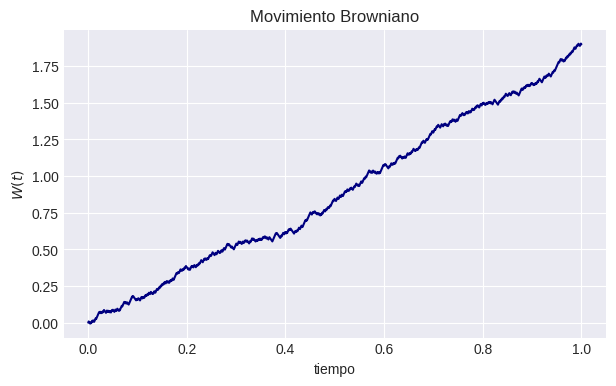

In [72]:
mbg1 = MB(N=1000, mu=1.5, sigma=0.2)
mbg1.simular_mbg()
mbg1.plot_browniano()

Notemos que como $X(t) \sim \mathcal{N}(0,1)$, entonces $W(t) = w_0 + \mu t + \sigma X(t) \sim \mathcal{N} (w_0 + \mu t, \sigma ^2 t)$

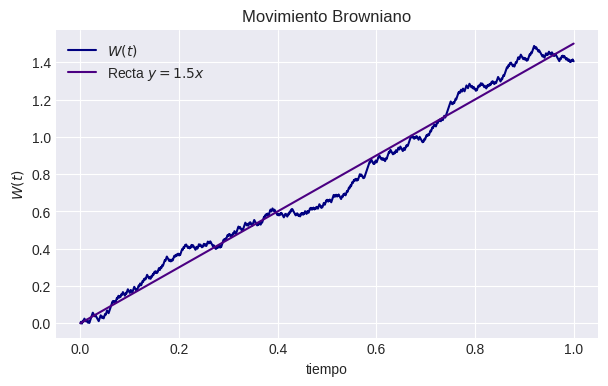

In [73]:
# Generamos el MB
np.random.seed(123)
mbg2 = MB(N=1000, mu=1.5, sigma=0.2)
tiempo, W_t = mbg2.simular_mbg()

# Graficamos la trayectoria junto con la recta
plt.figure(figsize=(7, 4))
plt.plot(tiempo, W_t, color='navy',label = r'$W(t)$')
plt.plot(tiempo, 1.5*np.array(tiempo), color = 'indigo', label = r'Recta $y = 1.5x$')
plt.legend()
plt.grid()
plt.title(r'Movimiento Browniano')
plt.xlabel('tiempo')
plt.ylabel(r'$W(t)$')
plt.show()

Veamos otro ejemplo

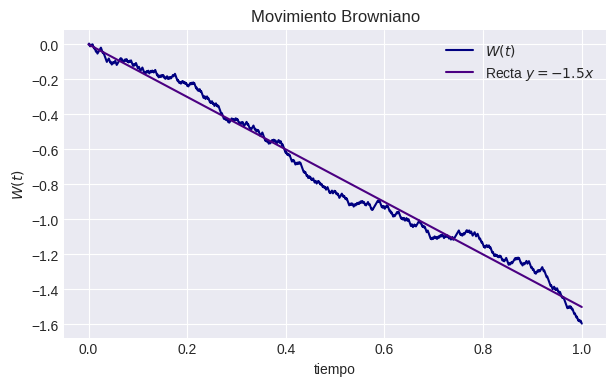

In [74]:
# Generamos el MB
np.random.seed(123)
mbg3 = MB(N=1000, mu=-1.5, sigma=0.2)
tiempo, W_t = mbg3.simular_mbg()

# Graficamos la trayectoria junto con la recta
plt.figure(figsize=(7, 4))
plt.plot(tiempo, W_t, color='navy', label = r'$W(t)$')
plt.plot(tiempo, -1.5*np.array(tiempo), color = 'indigo', label = r'Recta $y = -1.5x$')
plt.grid()
plt.legend()
plt.title(r'Movimiento Browniano')
plt.xlabel('tiempo')
plt.ylabel(r'$W(t)$')
plt.show()

¿Cómo se compara esto con la caminata aleatoria cuando $p \neq \frac{1}{2}$ del notebook [CM1_EjemplosdeProcesos](https://github.com/eliasegn/Procesos_I/blob/main/CM1_EjemplosdeProcesos.ipynb)?

### Simulación desde Incrementos Normales

Dado que los incrementos de un MBE siguen una distribución normal y son idependientes, podemos simularlo de la siguiente forma

**Pseudo-Código para generar un MBE desde Incrementos Normales**

Sea $N \in \mathbb{N}$. Buscamos una trayectoria del MBE, $\{W_0, W_1, ..., W_N\}$ en un intervalo $[0,T]$.

1. Dividimos al intervalo $[0,T]$ en una partición homogénea de tamaño $N$ y consideramos $\Delta t = t_{i} - t_{i-1}$
2. Hacemos $W_0 = 0$
3. Generamos $X \sim \mathcal{N}(0,1)$
4. Para cada $i \geq 1$, $W_i = W_{i-1} + x\sqrt(\Delta t)$

Veamos cómo se ve esto:


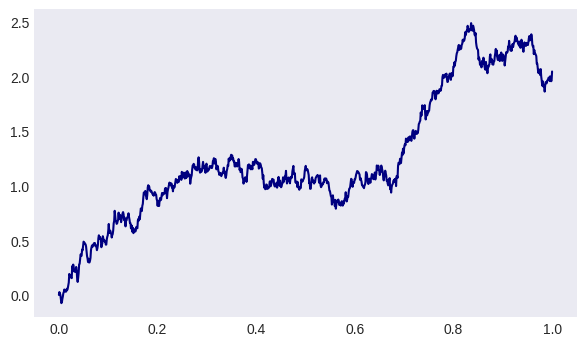

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros
T = 1
browniano = [0]
N = 1000
t = np.linspace(0, T, N)
delta = T/N

# Aplicamos incrementos normales
for _ in t:
  X = np.random.normal()
  browniano.append(browniano[-1] + X*np.sqrt(delta))

# Graficamos
plt.figure(figsize=(7, 4))
plt.plot(t, browniano[:-1], color = 'navy')

Ahora haremos una clase para este método

In [89]:
class MBEINormales():

  def __init__(self, N):
    '''
    N : número de pasos
    Wt : lista de valores de la trayectoria del MBE
    '''
    self.N = N
    self.Wt = [0]

  def simular_browniano_in(self, T=1, N= 1000):
    # La partición y delta t
    t = np.linspace(0, T, N)
    delta = T/N

    # Incrementos normales
    for _ in t:
      X = np.random.normal()
      self.Wt.append(self.Wt[-1] + X*np.sqrt(delta))

    # Devolvemos el dominio y la trayectoria
    return t, self.Wt[:-1]

  def plot_browniano_in(self, T=1, N=1000):
    t, Wt = self.simular_browniano_in(T, N)
    plt.figure(figsize=(7, 4))
    plt.plot(t, Wt, color = 'navy')
    plt.title('Movimiento Browniano Estándar')
    plt.xlabel('tiempo')
    plt.ylabel(r'$W(t)$')
    plt.show()


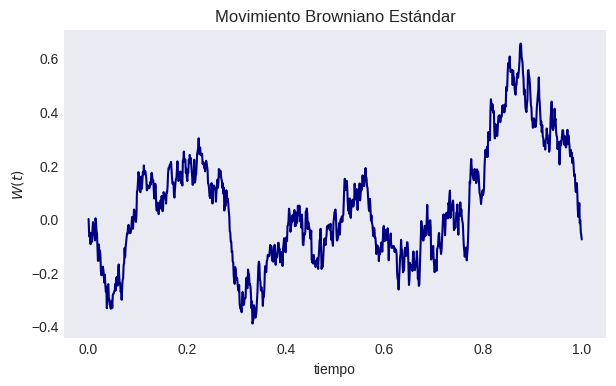

In [90]:
mbin1 = MBEINormales(N=1000)
mbin1.plot_browniano_in()

Ahora editaremos el código para calcular un Movimiento Browniano general

In [96]:
class MBIN_G(MBEINormales):

  def __init__(self, N, mu, sigma, w_0 = 0):
    '''
    N: número de pasos
    mu: parámetro del proceso MB
    sigma: parámetro del proceso MB
    w_0: valor inicial del proceso MB
    '''
    super().__init__(N)
    self.mu = mu
    self.sigma = sigma
    self.w0 = w_0
    self.Wt = [0]

  def simular_mb_in_g(self, T=1, N=1000):
    t, Wte = super().simular_browniano_in(T, N)
    # Aplicamos la definición de MB
    self.Wt = self.w0 + self.mu*t + self.sigma*np.array(Wte)
    return t, self.Wt

  def plot_mb_in_g(self, T=1, N=1000):
    t, Wt = self.simular_mb_in_g(T, N)
    plt.figure(figsize=(7, 4))
    plt.plot(t, Wt, color = 'navy')
    plt.title('Movimiento Browniano General')
    plt.xlabel('tiempo')
    plt.ylabel(r'$W(t)$')
    plt.show()

Ahora probemos nuestro código

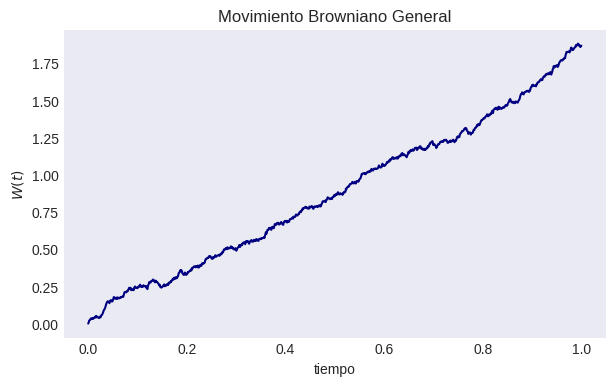

In [98]:
mbgin2 = MBIN_G(100, 1.5, 0.2, 0)
mbgin2.plot_mb_in_g()

Como vemos, también se parece mucho a lo obtenido en la caminata aleatoria que no es simétrica.